# Support Vector Machine(forest fires)

classify the Size_Categorie using SVM


In [23]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [24]:
# load the data
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [25]:
#Scaling the data
df1= df.iloc[:,2:30]

df2 = df1.values
df2

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1, ...,   0. ,   1. ,   0. ],
       [ 90.6,  43.7, 686.9, ...,   0. ,   1. ,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   0. ],
       [ 79.5,   3. , 106.7, ...,   1. ,   0. ,   0. ]])

In [26]:
# Normalization 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

df_norm = norm_func(df2)

In [27]:
# PCA to get best features
pca = PCA(n_components = 28)
pca_values = pca.fit_transform(df_norm)

In [28]:
# variance  
var = pca.explained_variance_ratio_

# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([90.71, 96.5 , 99.53, 99.92, 99.96, 99.98, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99])

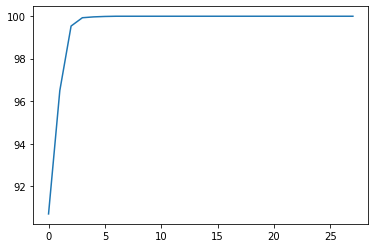

In [29]:
from matplotlib import pyplot as plt
plt.plot(var1)

In [30]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']),
                     df[['size_category']]], axis = 1)
finalDf

,pc1,pc2,pc3,size_category
0,0.423296,-0.006184,-0.001082,small
1,-0.096672,-0.019790,-0.087218,small
2,-0.114051,-0.019699,-0.082730,small
3,0.437314,-0.006019,0.010666,small
4,0.412064,-0.005438,0.022902,small
...,...,...,...,...
512,-0.097127,-0.012306,-0.068155,large
513,-0.097584,0.030727,-0.069555,large
514,-0.097032,-0.008666,-0.066566,large
515,-0.065922,-0.010941,0.021658,small


In [31]:
array = finalDf.values
X = array[:,0:3]
Y = array[:,3]

In [32]:
#train test split
from sklearn.model_selection import train_test_split
test_size = 0.33
seed = 8
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
np.round(result, 4)

0.7427

In [33]:
#kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 8
kfold = KFold(n_splits=num_folds)
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=kfold)
results.mean()
results.std()
print('Result:',np.round(results.mean(),4),'\n','\n','Std dev:',np.round(results.std(),4))

Result: 0.7347 
 
 Std dev: 0.2087


In [34]:
#Leave One Out Cross Validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loocv = LeaveOneOut()
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=loocv)
print('Result:',np.round(results.mean(),4),'\n','\n','Std dev:',np.round(results.std(),4))

Result: 0.735 
 
 Std dev: 0.4413


In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
# Grid search CV to get best value for K
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [37]:
print(grid.best_score_)
print(grid.best_params_)

0.7693801344286781
{'n_neighbors': 1}


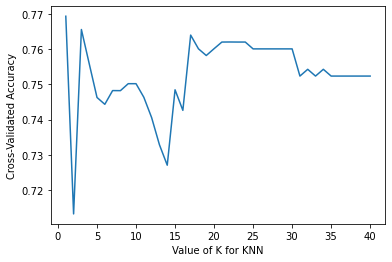

In [38]:
# Visualizing the CV results
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [39]:
#KNN Classification
num_folds = 10
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8104072398190045


In [40]:
# SVM Classification
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [41]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [42]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.9021008403361345)

In [43]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 91.22807017543859


array([[ 30,  15],
       [  0, 126]], dtype=int64)